# _Multi-label classification using deep learning algorithm_

Deployed as Web App: https://github.com/riyaeliza123/Skin-Disease-Classification

# Import Libraries

In [1]:
import numpy as np
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers import Activation, Dropout, Convolution2D, GlobalAveragePooling2D
from keras.models import Sequential
import tensorflow as tf
import tensorflow.keras.applications.mobilenet
import os

In [2]:
IMG_SAVE_PATH = r'/kaggle/input/skin-disease-classification-image-dataset/Split_smol/train' 

In [3]:
Str_to_Int = {
    'Actinic keratosis': 0,
    'Atopic Dermatitis': 1,
    'Benign keratosis': 2,
    'Dermatofibroma': 3,
    'Melanocytic nevus': 4,
    'Melanoma':5,
    'Squamous cell carcinoma': 6,
    'Tinea Ringworm Candidiasis':7,
    'Vascular lesion': 8
}

NUM_CLASSES = 9


def str_to_Int_mapper(val):
    return Str_to_Int[val]

# Data Preprocessing


In [4]:
import PIL
import cv2 

dataset = []
for directory in os.listdir(IMG_SAVE_PATH):
    path = os.path.join(IMG_SAVE_PATH, directory)
    for image in os.listdir(path):
        new_path = os.path.join(path, image)
        try:
            imgpath=PIL.Image.open(new_path)
            #if imgpath.shape!=(240,240,3):
            imgpath=imgpath.convert('RGB')
            img = np.asarray(imgpath)
            img = cv2.resize(img, (240,240))
            img=img/255.
            dataset.append([img, directory]) 
        except FileNotFoundError:
            print('Image file not found. Skipping...')

In [7]:
data, labels = zip(*dataset)
temp = list(map(str_to_Int_mapper, labels))

In [8]:
#data[0]

In [9]:
import keras
labels = keras.utils.to_categorical(temp)

In [10]:
count=0
for i in data:
    if i.shape!=(240, 240, 3):
        count=count+1
print(count)      

0


# DenseNet

In [11]:
from keras.applications import DenseNet121
from keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras import layers

densenet = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(240,240,3)
)

def build_densenet():
    model = Sequential()
    model.add(densenet)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(9, activation='sigmoid'))
    
    model.compile(
        loss='binary_crossentropy',
        optimizer=Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )
    
    return model

29084464/29084464 [==============================] - 2s 0us/step


In [12]:
model = build_densenet()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 9)                 9225      
                                                                 
Total params: 7,046,729
Trainable params: 6,963,081
Non-trainable params: 83,648
_________________________________________________________________


In [13]:
history=model.fit(np.array(data), np.array(labels), epochs = 10, shuffle = True, validation_split = 0.2)

Epoch 1/10
18/18 [==============================] - 71s 431ms/step - loss: 0.8614 - accuracy: 0.1598 - val_loss: 0.8236 - val_accuracy: 0.0143
Epoch 2/10
18/18 [==============================] - 4s 235ms/step - loss: 0.6316 - accuracy: 0.3950 - val_loss: 0.7838 - val_accuracy: 0.0143
Epoch 3/10
18/18 [==============================] - 4s 235ms/step - loss: 0.4580 - accuracy: 0.5799 - val_loss: 0.7914 - val_accuracy: 0.0071
Epoch 4/10
18/18 [==============================] - 4s 234ms/step - loss: 0.3614 - accuracy: 0.6732 - val_loss: 0.7160 - val_accuracy: 0.0643
Epoch 5/10
18/18 [==============================] - 4s 235ms/step - loss: 0.2950 - accuracy: 0.7379 - val_loss: 0.6402 - val_accuracy: 0.1071
Epoch 6/10
18/18 [==============================] - 4s 235ms/step - loss: 0.2350 - accuracy: 0.8151 - val_loss: 0.5772 - val_accuracy: 0.1286
Epoch 7/10
18/18 [==============================] - 4s 236ms/step - loss: 0.1980 - accuracy: 0.8725 - val_loss: 0.5331 - val_accuracy: 0.1857
Epoch

In [14]:
import seaborn as sns
from matplotlib import pyplot
    
def plot_acc(history):
    sns.set()

    fig = pyplot.figure(0, (12, 4))

    ax = pyplot.subplot(1, 2, 1)
    sns.lineplot(x=history.epoch, y=history.history['accuracy'], label='train')
    sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label='valid')
    pyplot.title('Accuracy')
    pyplot.tight_layout()

    ax = pyplot.subplot(1, 2, 2)
    sns.lineplot(x=history.epoch, y=history.history['loss'], label='train')
    sns.lineplot(x=history.epoch, y=history.history['val_loss'], label='valid')
    pyplot.title('Loss')
    pyplot.tight_layout()

    pyplot.show()

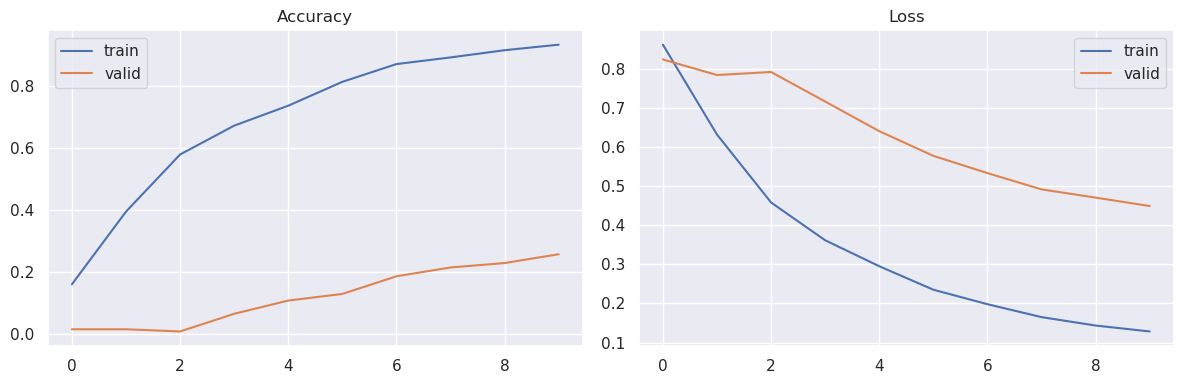

In [15]:
plot_acc(history)

# Mobilenet

In [16]:
def mobilenet():
    model = Sequential([
        tf.keras.applications.mobilenet.MobileNet(input_shape=(240,240, 3), include_top=False),
        Dropout(0.5),
        Convolution2D(9, (1, 1), padding='valid'),
        Activation('relu'),        # Rectified Linear Unit - Activation Function
        GlobalAveragePooling2D(),  # Pooling Layer
        Activation('softmax')      # Softmax - Activation Function - For Multi Class Classification
    ])
    return model

In [17]:
# define the model
model_mobile = mobilenet()
model_mobile.compile(
    optimizer=Adam(learning_rate=0.0001),         # lr = learning_rate
    loss='categorical_crossentropy',   # Multi-class classification
    metrics=['accuracy']  
)

17225924/17225924 [==============================] - 1s 0us/step


In [18]:
model_mobile.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 1024)        0         
                                                                 
 conv2d (Conv2D)             (None, 7, 7, 9)           9225      
                                                                 
 activation (Activation)     (None, 7, 7, 9)           0         
                                                                 
 global_average_pooling2d_1   (None, 9)                0         
 (GlobalAveragePooling2D)                                        
                                                                 
 activation_1 (Activation)   (None, 9)                

In [19]:
history_mobile=model_mobile.fit(np.array(data), np.array(labels), epochs = 10, shuffle = True, validation_split = 0.3)

Epoch 1/10


2025-04-22 11:26:06.678301: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


16/16 [==============================] - 16s 243ms/step - loss: 1.5191 - accuracy: 0.4805 - val_loss: 3.5387 - val_accuracy: 0.0048
Epoch 2/10
16/16 [==============================] - 3s 176ms/step - loss: 0.4706 - accuracy: 0.8645 - val_loss: 4.9301 - val_accuracy: 0.0000e+00
Epoch 3/10
16/16 [==============================] - 3s 174ms/step - loss: 0.2080 - accuracy: 0.9507 - val_loss: 4.2618 - val_accuracy: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 3s 174ms/step - loss: 0.1046 - accuracy: 0.9856 - val_loss: 3.8212 - val_accuracy: 0.0095
Epoch 5/10
16/16 [==============================] - 3s 174ms/step - loss: 0.0825 - accuracy: 0.9877 - val_loss: 3.6423 - val_accuracy: 0.0333
Epoch 6/10
16/16 [==============================] - 3s 174ms/step - loss: 0.0614 - accuracy: 0.9979 - val_loss: 3.7706 - val_accuracy: 0.0619
Epoch 7/10
16/16 [==============================] - 3s 174ms/step - loss: 0.0398 - accuracy: 0.9979 - val_loss: 3.6982 - val_accuracy: 0.0905
Epoch 8/

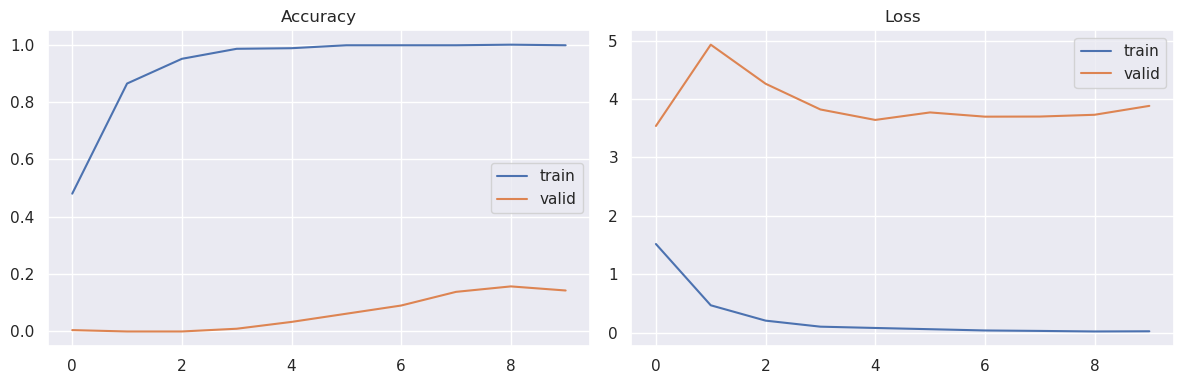

In [20]:
plot_acc(history_mobile)

# CNN

In [21]:
def cnn():
    model=Sequential()

    model.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(240,240,3)))
    model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(9, activation='softmax'))
    
    return model

In [22]:
from keras.layers import Dense , Dropout , Conv2D , MaxPooling2D, Flatten
model_cnn=cnn()
model_cnn.compile(
    optimizer=Adam(learning_rate=0.0001),         # lr = learning_rate
    loss='categorical_crossentropy',   # Multi-class classification
    metrics=['accuracy']  
)

In [23]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 238, 238, 8)       224       
                                                                 
 conv2d_2 (Conv2D)           (None, 236, 236, 16)      1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 118, 118, 16)     0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 118, 118, 16)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 116, 116, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 32)       0         
 2D)                                                  

In [24]:
history_cnn=model_cnn.fit(np.array(data), np.array(labels), epochs = 5, shuffle = True, validation_split = 0.25)

Epoch 1/5


2025-04-22 11:33:39.046902: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


17/17 [==============================] - 4s 87ms/step - loss: 2.1030 - accuracy: 0.1341 - val_loss: 2.7243 - val_accuracy: 0.0057
Epoch 2/5
17/17 [==============================] - 1s 48ms/step - loss: 2.0360 - accuracy: 0.1762 - val_loss: 2.6695 - val_accuracy: 0.0000e+00
Epoch 3/5
17/17 [==============================] - 1s 49ms/step - loss: 1.9964 - accuracy: 0.1839 - val_loss: 2.7433 - val_accuracy: 0.0000e+00
Epoch 4/5
17/17 [==============================] - 1s 47ms/step - loss: 1.9532 - accuracy: 0.1973 - val_loss: 2.8263 - val_accuracy: 0.0000e+00
Epoch 5/5
17/17 [==============================] - 1s 47ms/step - loss: 1.9253 - accuracy: 0.2241 - val_loss: 2.7686 - val_accuracy: 0.0000e+00


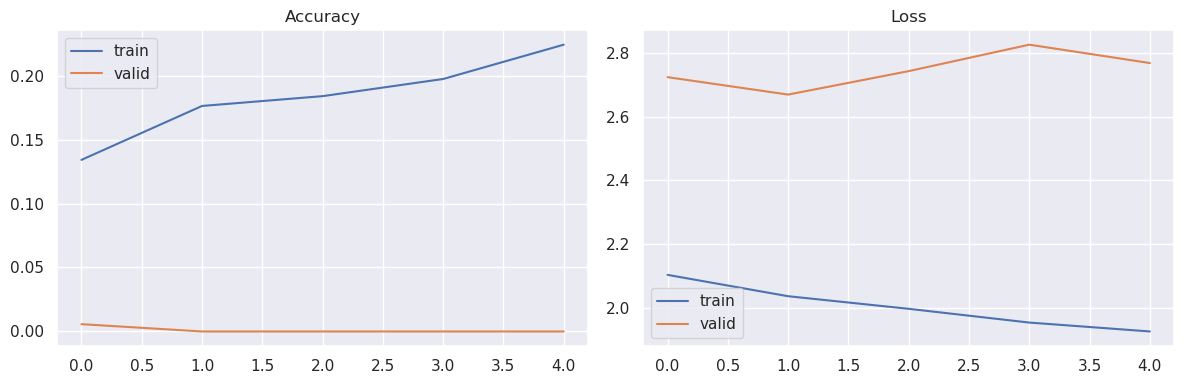

In [25]:
plot_acc(history_cnn)

# Save model

In [26]:
# save the model for later use
model.save("skin_disease_model_ISIC_densenet.h5")

# Evaluate Models

In [27]:
IMG_SAVE_PATH_TESTING = r'/kaggle/input/skin-disease-classification-image-dataset/Split_smol/val'

In [28]:
import PIL
import cv2
dataset_testing = []
for directory in os.listdir(IMG_SAVE_PATH_TESTING):
    path = os.path.join(IMG_SAVE_PATH_TESTING, directory)
    for image in os.listdir(path):
        new_path = os.path.join(path, image)
        imgpath=PIL.Image.open(new_path)
        #if imgpath.shape!=(240,240,3):
        imgpath=imgpath.convert('RGB')
        img = np.asarray(imgpath)
#         img = cv2.imread(new_path)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (240, 240))
        img=img/255.
        dataset_testing.append([img, directory]) 

In [29]:
testing_data, testing_labels = zip(*dataset_testing)
testing_temp = list(map(str_to_Int_mapper, testing_labels))

In [30]:
import keras
testing_labels = keras.utils.to_categorical(testing_temp)

In [31]:
model.evaluate(np.array(testing_data), np.array(testing_labels))

6/6 [==============================] - 1s 139ms/step - loss: 0.3268 - accuracy: 0.5912


[0.32683056592941284, 0.591160237789154]

In [32]:
model_mobile.evaluate(np.array(testing_data), np.array(testing_labels))

6/6 [==============================] - 0s 42ms/step - loss: 1.5549 - accuracy: 0.6243


[1.5549464225769043, 0.6243094205856323]

In [33]:
model_cnn.evaluate(np.array(testing_data), np.array(testing_labels))

6/6 [==============================] - 0s 27ms/step - loss: 2.1786 - accuracy: 0.2320


[2.178563356399536, 0.23204420506954193]

# Prediction

In [34]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
import scikitplot

# Make predictions
def make_preds(model):
    label_preds = model.predict(np.array(testing_data))

    def one_hot_highest(arr):
        for row in arr:
            max_val = max(row)
            for i in range(len(row)):
                if row[i] == max_val:
                    row[i] = 1
                else:
                    row[i] = 0
        return arr

    arr=one_hot_highest(label_preds) #one hot
    arr2= one_hot_highest(testing_labels)

    labelenc=[]
    for i in range (0, len(arr)):
        flag=0
        for j in range (0,9):
            if arr[i][j]==1:
                labelenc.append(j)
                flag=1 
    labelenctest=[]
    for i in range (0, len(arr2)):
        for j in range (0,9):
            if arr2[i][j]==1:
                labelenctest.append(j)

    scikitplot.metrics.plot_confusion_matrix(labelenctest,labelenc)

6/6 [==============================] - 2s 55ms/step


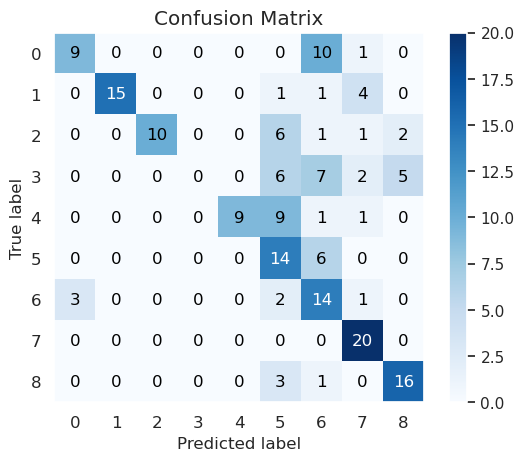

In [35]:
make_preds(model)

6/6 [==============================] - 1s 26ms/step


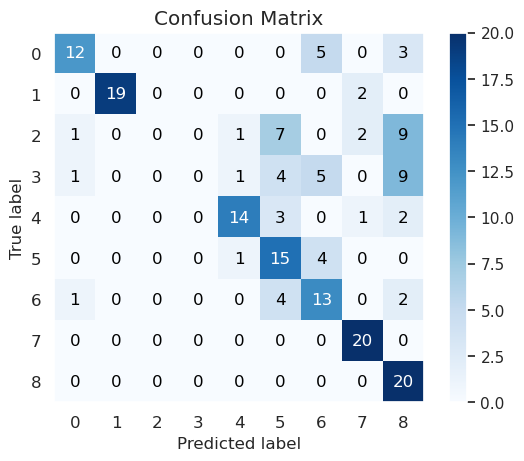

In [36]:
make_preds(model_mobile)

6/6 [==============================] - 0s 12ms/step


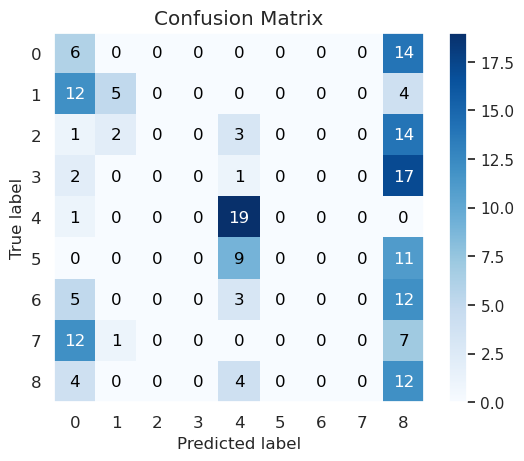

In [37]:
make_preds(model_cnn)

In [38]:
import tensorflow as tf
import os

# Assuming 'model' is the trained DenseNet121 model from your notebook
# Save the model in SavedModel format
model_save_path = "/kaggle/working/skin_disease_model"
model.save(model_save_path)

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_saved_model(model_save_path)
tflite_model = converter.convert()

# Save the TFLite model to a file
tflite_model_path = "/kaggle/working/skin_disease_model.tflite"
with open(tflite_model_path, "wb") as f:
    f.write(tflite_model)

print(f"TFLite model saved to {tflite_model_path}")

TFLite model saved to /kaggle/working/skin_disease_model.tflite


In [72]:
import joblib

# Assuming 'model' is your trained sklearn model
joblib.dump(model, 'model.sav')  # Saves it in the current directory



Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dropout
.........vars
......functional
.........layers
............activation
...............vars
............activation_1
...............vars
............activation_10
...............vars
............activation_100
...............vars
............activation_101
...............vars
............activation_102
...............vars
............activation_103
...............vars
............activation_104
...............vars
............activation_105
...............vars
............activation_106
...............vars
............activation_107
...............vars
............activation_108
...............vars
............activation_109
...............vars
............activation_11
...............vars
............activation_110
...............vars
............activation_111
...............vars
............activation_112
...............vars
............activa

['model.sav']

In [75]:
pip install streamlit joblib numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 66.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 51.7 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=f3371ee5561cf2d7181719f160b20604340bdb9c478553809850e36f24b95f92
  Stored in directory: /root/.cache/pip/wheels/3d/7c/f1/f87f51d07a2513aa0fb128d5eb504da1fcef9c87475d9eef64
Successfully built validators
Note: you may need to restart the kernel to use updated packages.


In [77]:
streamlit run /opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py

SyntaxError: invalid syntax (1162852295.py, line 1)